# ------------    distribution plots    ------------
#### Let's go over some plots that help visualize the distribution of a dataset
        #   distplot
        #   jointplot
        #   pairplot
        #   rugplot
        #   kdeplot

In [1]:
# import libraries
import seaborn as sns
# shows figures in ipynb
%matplotlib inline

In [2]:
# lets load a builtin dataset of seaborn. tips: a dataset of restaurant patrons' tipping behavior
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

___

## ------------    distplot    ------------
    # it shows the distribution of uni-variate (one-variable) set of observations

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

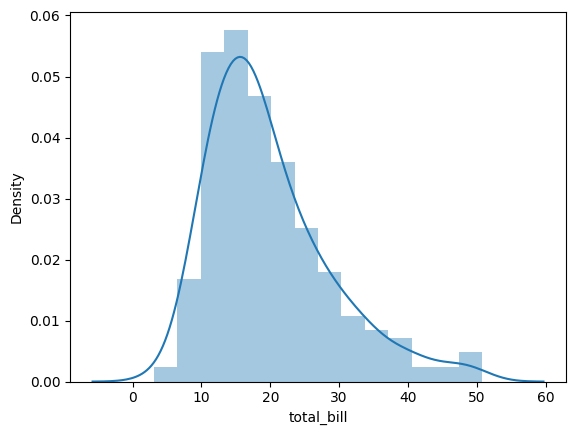

In [5]:
# use a single column of your datsset
sns.distplot(tips['total_bill'])

<AxesSubplot:xlabel='tip'>

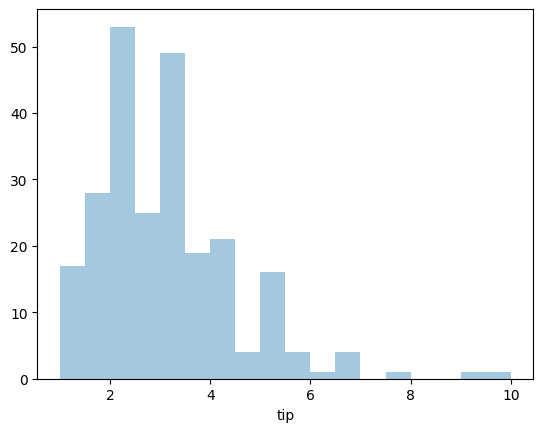

In [6]:
# Notice we have a "kde (kernel density estimation) layer" (the blue line)
# to remove it, we just use "kde=False"
sns.distplot(tips['tip'], kde=False)
# now we just have a "histogram" is just a distribution of the data-points
# Y-axis is the "counts" and X-axis is the "data"
# so $2 nad $3 are most given tips

<AxesSubplot:xlabel='total_bill'>

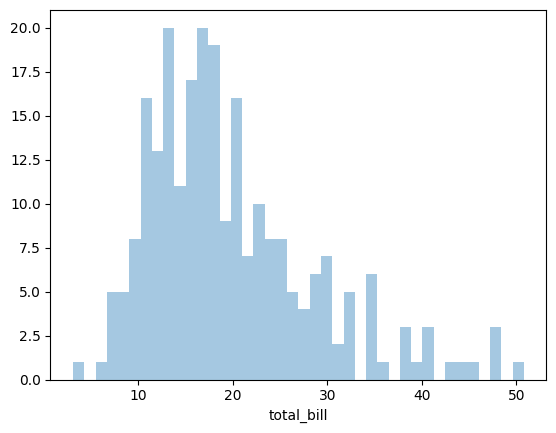

In [4]:
# change noumber of bins (depends on dataset)
# bins too high plots every single instance, make your plot wierd
sns.distplot(tips['total_bill'], kde=False, bins=40)
# most of the bills happens in between 10 and 20 dollers

___

# ------------    jointplot    ------------
    # jointplot() creates a combined view of two distributions for bivariate data, 
    # allowing you to select a comparison type with the kind parameter:
    #   "scatter" -  scatter plot
    #   "reg"     -  regression plot
    #   "resid"   -  residuals plot
    #   "kde"     -  kernel density plot
    #   "hex"     -  hexbin plot

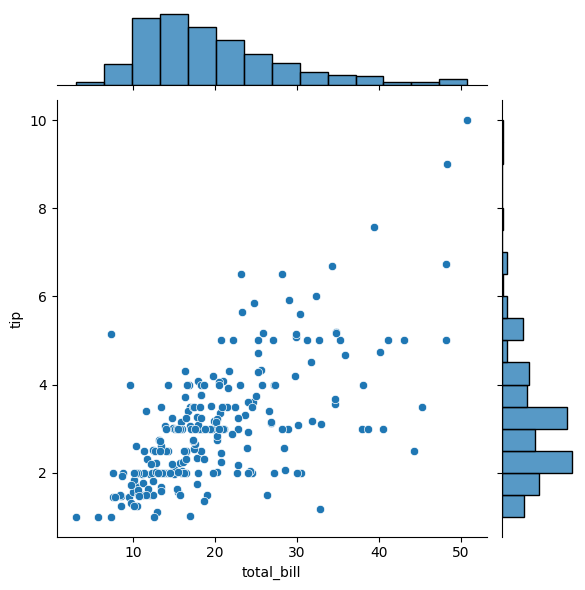

In [3]:
# For example we can combine 2 dstribution plots of both (columns of or dataset) "total_bill" and "tip" 
#   also we can plot their relation on a scatterplot (to compare those 2 distributions)
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')
# notice, higher the total_bill has higher tips
# most of the tips lie between (1, 5) for total_bill (5, 35)

### ----  hexbin plot  ----

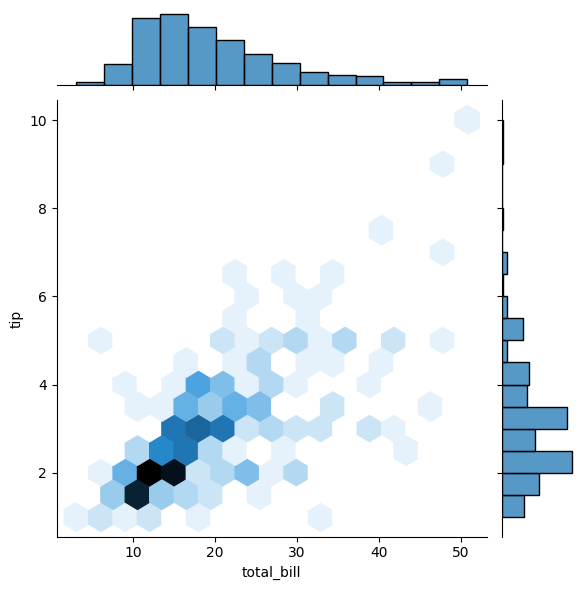

In [4]:
# hexagon distribution representation
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

### ----  regression plot  ----

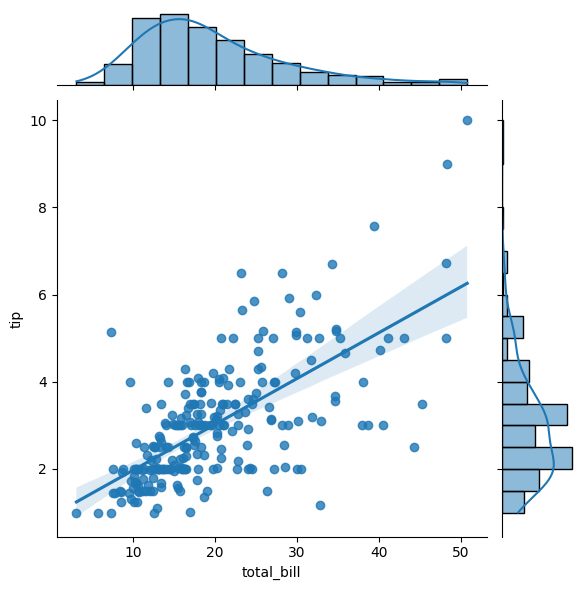

In [5]:
# plots an additional "regression line" (we'll discuss more in Machine Learning)
# notice the linear fitting using p-value (and pearsonr coefficient)
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')
# by default "kind" is "scatter", now we've set it to 'hex' and 'reg'

### ----  2D kde  ----

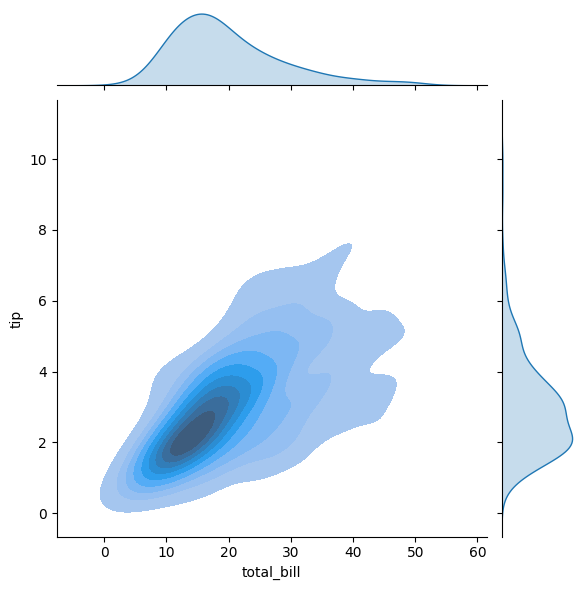

In [5]:
# density of the points
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde', fill=True)

___

# ------------    pairplot    ------------
    # pairplot will plot "pairwise relationships" across an entire dataframe (for the numerical columns) 
    # it supports a color hue argument (for categorical columns). 

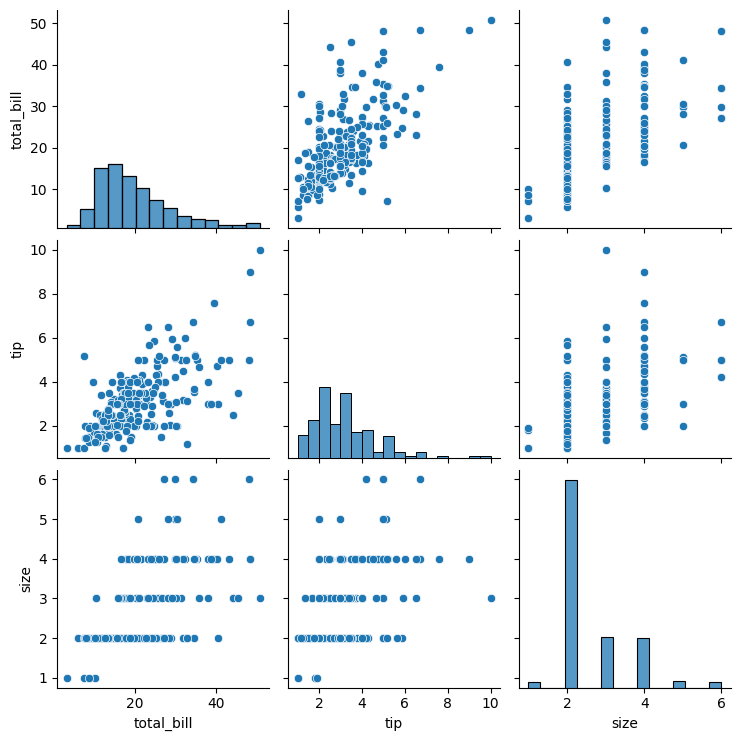

In [7]:
sns.pairplot(tips)
# it applies jointplot to all possible combination of our dtaset's numerical columns
# so it takes more time for larger dataFrames
# good way to quickly visualize our data

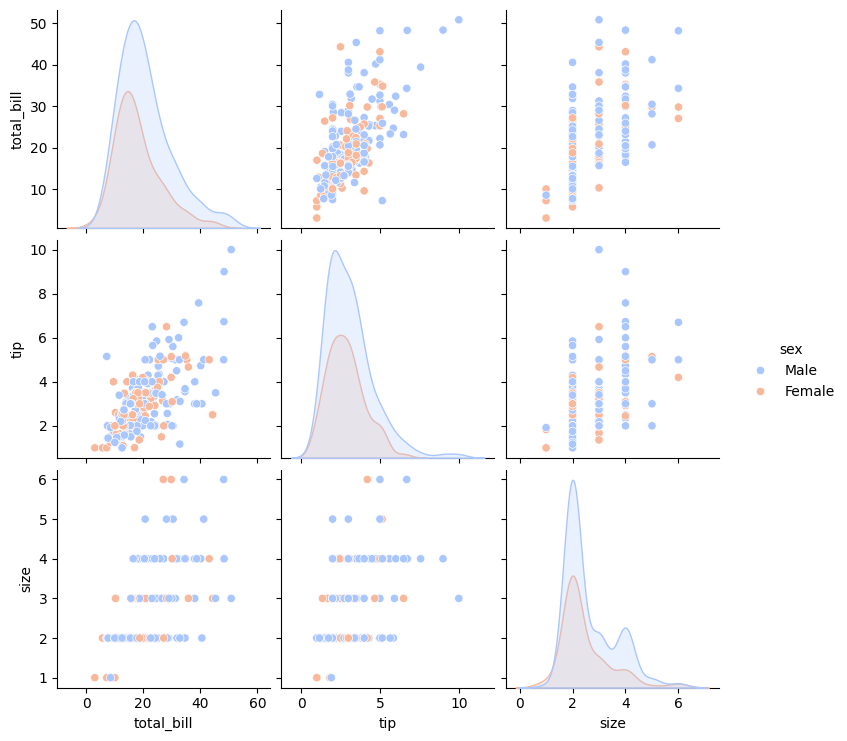

In [8]:
# hue using 'sex' variable from our dataset
# we have to use a 'categorical' column like "sex"
# use "palette" to modify color
sns.pairplot(tips, hue='sex', palette='coolwarm')

___

# ------------    kdepot, rugplot    ------------
    # A rugplot is a simple plot that places a "dash mark" for each point in a "univariate" distribution
    # They are the building block of a KDE plot

### ----  rugplot  ----

<AxesSubplot:xlabel='tip'>

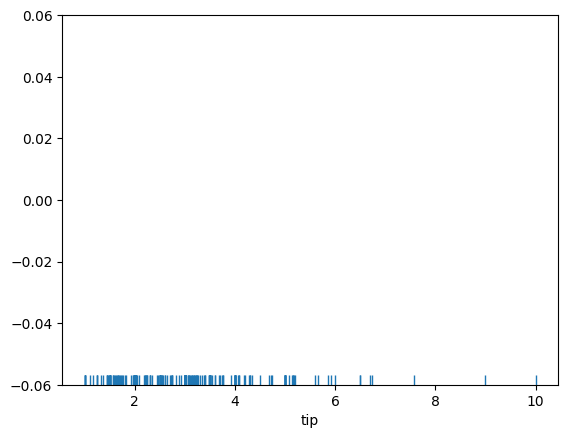

In [6]:
sns.rugplot(tips['tip'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

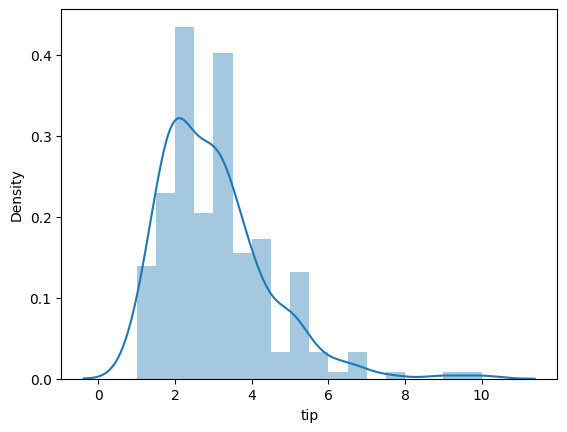

In [11]:
# compare to histogram: shows how many dashes (stacked) in a bin, 
# less high in "histogram" means less dashes in "rugplot"
# sns.histplot(tips['tip'], kde=True)
sns.distplot(tips['tip'], kde=True)

### ----  kdeplot  ----
    # if we just want the kde only (not bins)


<AxesSubplot:xlabel='tip', ylabel='Density'>

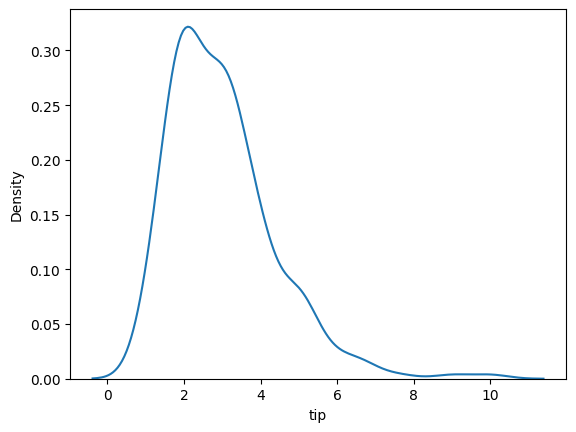

In [4]:
sns.kdeplot(tips['tip'])

## ----  How to build "kde" using "rugplot"?  ----
    # kde has a kind of relation with rugplot count
    # kde: kernel density estimation

    # we'll construct a dataset, we then observe the "normal Gaussian distribution" of the dashes of rugplot, 
    # and then we'll see how to construct kde from those distributions (by adding)

(0.0, 1.0)

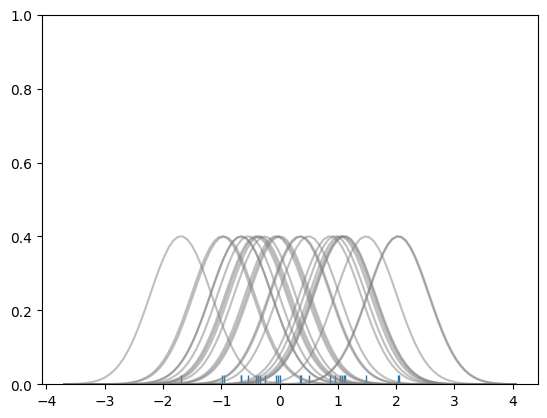

In [5]:
# to observe this, we'll copy some code (don't worry about understanding this code)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# use stats.norm() to make the normal distribution
# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    # "stats.norm" plots the normal distribution for each of the rugplot
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

# notice in the figure: each of the normal-distribution for each of the bule-dashes
# each normal distribution is centered around each dash
# we're having bunch of them in top of each other
    # now we're going to "sum them all up" to get the "kernel density basis function"
    # to do that we're going to use following code

Text(0.5, 0.98, 'Sum of the Basis Functions')

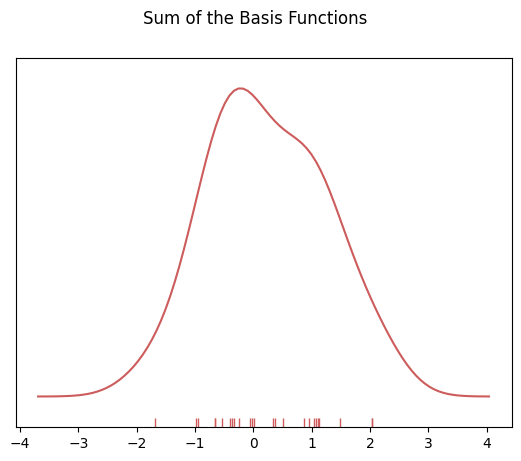

In [6]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

# Note: that's how the "kdeplot" is constructed in the "distplot"

### ----  kdeplot and rugplot togateher  ----

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

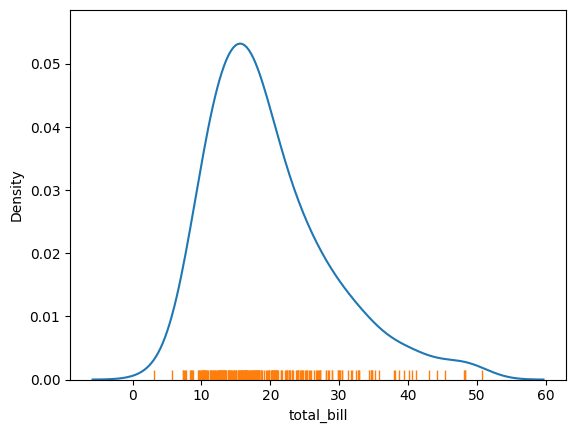

In [7]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

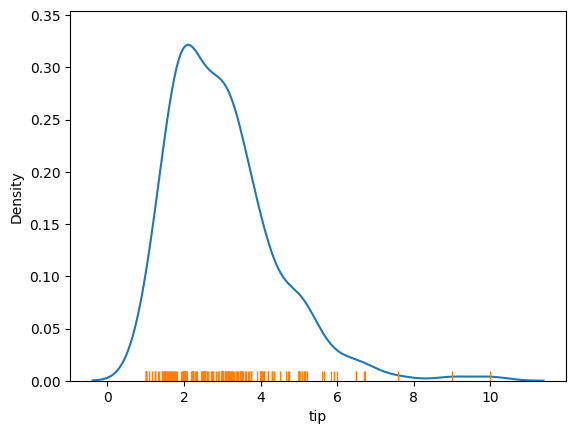

In [8]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])